<a href="https://colab.research.google.com/github/Aditya-Shandilya1182/Image_Classifier/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Pre-Processing

In [57]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [58]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

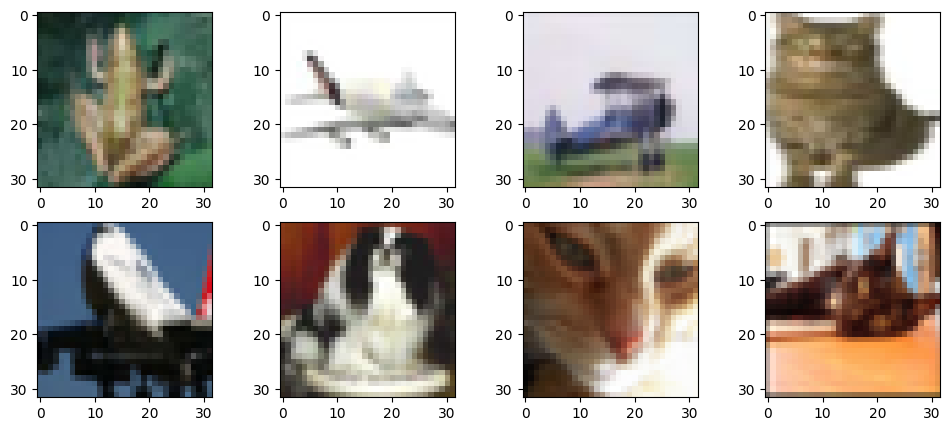

In [59]:
import random
plt.figure(figsize = (12, 5))
for i in range(8):
  ind = random.randint(0, len(x_train))
  plt.subplot(240+1+i)
  plt.imshow(x_train[ind])

In [60]:
def prepareData(x_train, y_train, x_test, y_test):

  #Normalization
  x_train, x_test = x_train / 255.0, x_test / 255.0

  #One-hot encoding labels
  y_train_one_hot = tf.keras.utils.to_categorical(y_train)
  y_test_one_hot = tf.keras.utils.to_categorical(y_test)

  return x_train, x_test, y_test_one_hot, y_train_one_hot

In [61]:
x_train, x_test, y_test_one_hot, y_train_one_hot = prepareData(x_train, y_train, x_test, y_test)

In [62]:
x_train.shape, x_test.shape, y_test_one_hot.shape, y_train_one_hot.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (10000, 10), (50000, 10))

# Model

In [63]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = (3, 3),
                           padding = 'same',
                           activation = 'relu',
                           input_shape = (32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(filters = 128,
                           kernel_size = (3, 3),
                           activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(filters = 256,
                           kernel_size = (3, 3),
                           activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(filters = 512,
                           kernel_size = (3, 3),
                           activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=["accuracy"])


In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_56 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_35 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 batch_normalization_57 (Ba  (None, 14, 14, 128)      

# Trainig The Model

In [65]:
model_training_history = model.fit(x_train, y_train_one_hot, epochs = 10, batch_size = 128, validation_data = (x_test, y_test_one_hot))

Epoch 1/10
391/391 [==============================] - 15s 21ms/step - loss: 1.8021 - accuracy: 0.3753 - val_loss: 2.2947 - val_accuracy: 0.2579
Epoch 2/10
391/391 [==============================] - 7s 18ms/step - loss: 1.1309 - accuracy: 0.6072 - val_loss: 1.3396 - val_accuracy: 0.5331
Epoch 3/10
391/391 [==============================] - 7s 19ms/step - loss: 0.8967 - accuracy: 0.6974 - val_loss: 0.9385 - val_accuracy: 0.6847
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 0.7564 - accuracy: 0.7511 - val_loss: 0.9980 - val_accuracy: 0.6605
Epoch 5/10
391/391 [==============================] - 7s 18ms/step - loss: 0.6480 - accuracy: 0.7877 - val_loss: 1.1655 - val_accuracy: 0.6360
Epoch 6/10
391/391 [==============================] - 7s 19ms/step - loss: 0.5531 - accuracy: 0.8228 - val_loss: 0.9967 - val_accuracy: 0.7072
Epoch 7/10
391/391 [==============================] - 7s 18ms/step - loss: 0.4727 - accuracy: 0.8493 - val_loss: 1.0132 - val_accuracy: 0.695

In [69]:
_, accuracy = model.evaluate(x_test, y_test_one_hot, verbose = 1)

313/313 [==============================] - 1s 4ms/step - loss: 1.1913 - accuracy: 0.6913


In [70]:
accuracy * 100

69.12999749183655